# Take a look at the dataset and how we preprocess it

In [1]:
import datasets
import librosa
import numpy as np
from constants import *
from visualization import *
import preprocessing
from librosa.display import waveplot
from IPython.display import Audio
import matplotlib.pyplot as plt

Take a random song.

In [ ]:
dataset = datasets.GTZAN()

In [2]:
dataset = datasets.BALLROOM()

In [3]:
i = np.random.randint(dataset.nb_files)
print(dataset.filename(i))

Media-104017


Listen to the song with its beat track.

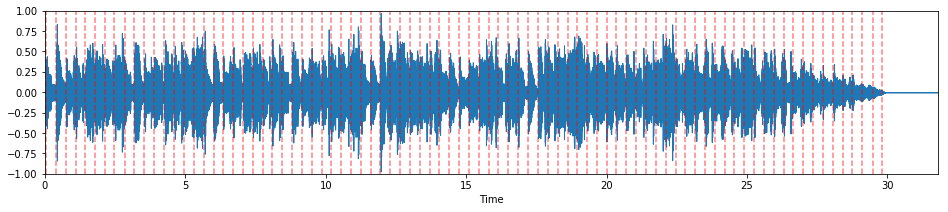

In [4]:
wav = librosa.load(dataset.wav_file(i), sr)[0]
beats = dataset.load_beats(dataset.annotation_file(i))
plt.figure(figsize=(16, 3))
librosa.display.waveplot(wav, sr)
plt.vlines(beats, -1, 1, color='r', alpha=0.5, linestyles='--')
plt.ylim(-1, 1);
clicks = librosa.clicks(times=beats, sr=sr, length=len(wav))
Audio(wav + clicks, rate=sr)

Show the spectrogram.

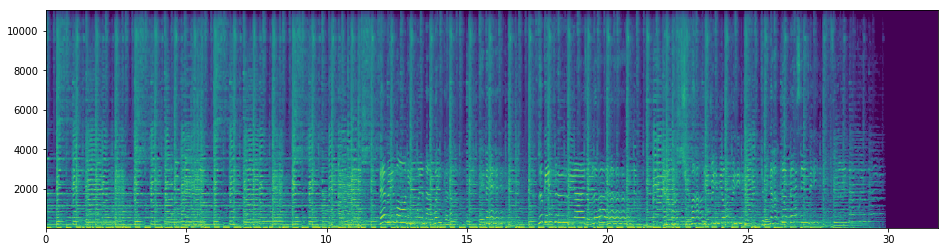

In [5]:
spec = preprocessing.get_spec(librosa.load(dataset.wav_file(i), sr)[0])
showspec(spec)

See the onsets and the one we select according to the beat track.

In [6]:
onsets, isbeat = preprocessing.get_onsets_from_beats(spec, beats)

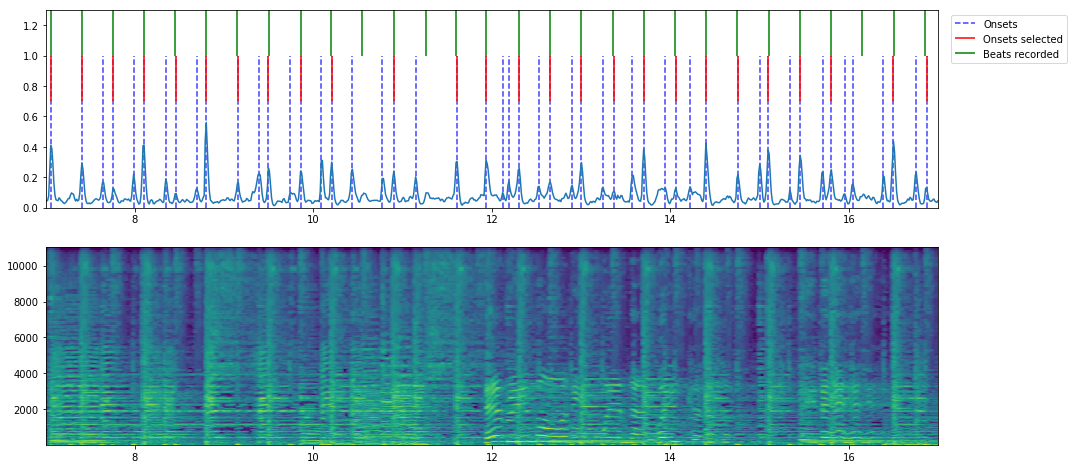

In [7]:
showdata(spec, onsets, isbeat, beats)

# Precompute all spectrograms and onsets data

In [ ]:
dataset = datasets.GTZAN(nb_files=6)

In [ ]:
dataset.precompute()

In [ ]:
dataset = datasets.BALLROOM(nb_files=6)

In [ ]:
dataset.precompute()

# Verify that the dataset class works well

In [ ]:
i = np.random.randint(len(dataset))
print(f'{i}/{len(dataset)}')

In [ ]:
spec, onsets, isbeat = dataset[i]
beats = dataset.get_beats(i)
wav = dataset.get_wav(i)
clicks = librosa.clicks(beats, sr=sr, length=len(wav))
showdata(spec, onsets, isbeat, beats, duration=10, offset=0)
Audio(wav + clicks, rate=sr)

# Test that there is no delay when computing the onsets

In [ ]:
beats = np.arange(0, 5, 0.5, dtype=np.float) + np.random.rand()

In [ ]:
clicks = librosa.clicks(times=beats, sr=sr)

In [ ]:
Audio(clicks, rate=sr)

In [ ]:
librosa.output.write_wav('./tests/test.wav', clicks, sr)

In [ ]:
wav = librosa.load('./tests/test.wav', sr)[0]
plt.figure(figsize=(16, 3))
librosa.display.waveplot(wav, sr)
plt.vlines(beats, -1, 1, color='r', alpha=0.5, linestyles='--')
plt.ylim(-1, 1);
cclicks = librosa.clicks(times=beats, sr=sr, length=len(wav))
Audio(wav + cclicks, rate=sr)

In [ ]:
spec = get_spec('./tests/test.wav')
showspec(spec)

In [ ]:
onsets, isbeat = get_onsets_no_repeat(spec, beats)
showdata(spec, onsets, isbeat, beats)

In [ ]:
onsets_times = librosa.frames_to_time(onsets, sr, hl)

In [ ]:
clickss = librosa.clicks(times=onsets_times, sr=sr, length=len(wav))
Audio(wav + clickss, rate=sr)

In [ ]:
plt.figure(figsize=(16, 4))
librosa.display.waveplot(wav + clickss, sr)